Задание 1. Классификатор k-ближайших соседей для набора данных ирисов Фишера

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Загрузка датасета

iris = sns.load_dataset('iris')
plt.figure(figsize=(16,7))

<Figure size 1600x700 with 0 Axes>

<Figure size 1600x700 with 0 Axes>

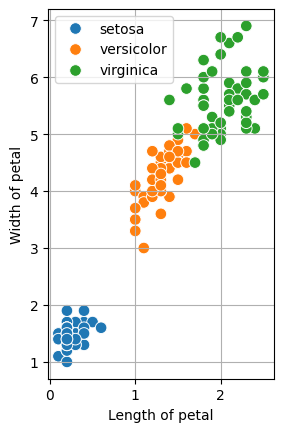

In [3]:
# Левые графики 

# График зависимости ширины лепестка от его длины 
plt.subplot(121)
sns.scatterplot(data=iris, x='petal_width', y ='petal_length', hue='species', s=70)

# График зависимости для длины и ширины чашелистика
plt.xlabel("Length of petal")
plt.ylabel('Width of petal')
plt.legend()
plt.grid()

<function matplotlib.pyplot.show(close=None, block=None)>

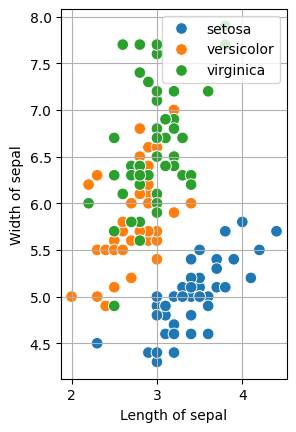

In [4]:
# Правые графики аналогично левым

plt.subplot(122)
sns.scatterplot(data=iris, x='sepal_width', y ='sepal_length', hue='species', s=70)
plt.xlabel('Length of sepal')
plt.ylabel('Width of sepal')
plt.legend()
plt.grid()
plt.show

In [5]:
# Делим датасет на обучающую и тестовую выборки в соотношении 80:20
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, :-1], 
                                                    iris.iloc[:, -1], test_size=0.15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train.head()
y_train.head()

# Метод пяти ближайщих соседей
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Предсказание модели
y_pred = model.predict(X_test)
y_pred

array(['setosa', 'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'versicolor'], dtype=object)

accurancy: 0.913


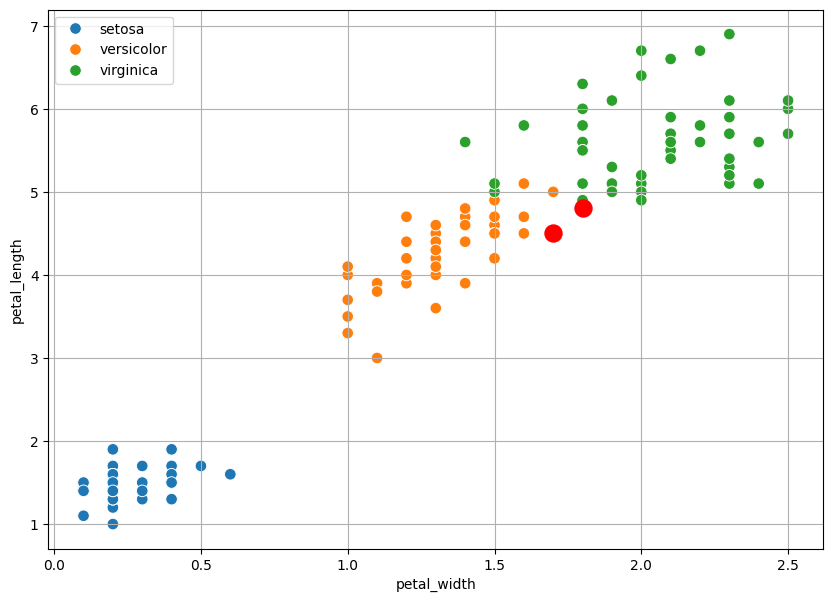

In [6]:
# Отражение полученного числа на графике

plt.figure(figsize=(10,7))
sns.scatterplot(data=iris, x='petal_width', y ='petal_length', hue='species', s=70)
plt.legend(loc=2)
plt.grid()

# Перебираем объекты. Красный цвет - неправильная классификация объекта
for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        plt.scatter(X_test.iloc[i,3], X_test.iloc[i,2], color='red', s=150)

# Качество модели 
print(f'accurancy: {accuracy_score(y_test, y_pred) :.3}')